<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/Reduccion_dimensiones_A01794067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A01794067**
### **José Antonio Mendoza Castro**
### *Reducción de dimensiones*

### **Ciencia y analitica de datos**

### **Dra. Maria de la Paz Rico**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W @ D @ Winv  
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
#Matriz 1
A = np.array([[3, 0, 2],
              [3, 0, -2],
              [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------\n")

values, vectors = eig(A)
W = vectors
D = np.diag(values)
Winv = np.linalg.inv(W)


print("--------------W--------------")
print(W)
print("-----------------------------\n")

print("--------------D--------------")
print(D)
print("-----------------------------\n")

print("-------------Winv-------------")
print(Winv)
print("------------------------------\n")


B = W @ D @ Winv
print("-----Matriz reconstruida-----")
print(np.round(B.real, decimals = 1))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------

--------------W--------------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------

--------------D--------------
[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.22774424+1.82582815j 0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.22774424-1.82582815j]]
-----------------------------

-------------Winv-------------
[[-0.95827338-1.73001905e-17j -0.1739303 +3.46003810e-17j
  -0.61649796-0.00000000e+00j]
 [-0.30900456-3.92091481e-01j  0.52417711+1.74262881e-01j
  -0.19879576+9.96744696e-01j]
 [-0.30900456+3.92091481e-01j  0.52417711-1.74262881e-01j
  -0.19879576-9.96744696e-01j]]
------------------------------

-----M

In [3]:
#Matriz 2
A2 = np.array([[1, 3, 8],
              [2, 0, 0],
              [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------\n")

values, vectors = eig(A2)
W = vectors
D = np.diag(values)
Winv = np.linalg.inv(W)


print("--------------W--------------")
print(W)
print("-----------------------------\n")

print("--------------D--------------")
print(D)
print("-----------------------------\n")

print("-------------Winv-------------")
print(Winv)
print("------------------------------\n")


B = W @ D @ Winv
print("-----Matriz reconstruida-----")
print(np.round(B, decimals = 1))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------

--------------W--------------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-----------------------------

--------------D--------------
[[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]
-----------------------------

-------------Winv-------------
[[ 0.72111026  0.72111026  2.88444102]
 [-0.56568542  0.84852814  1.50849447]
 [ 0.          0.          3.14466038]]
------------------------------

-----Matriz reconstruida-----
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [4]:
#Matriz 3
A3 = np.array([[5, 4, 0],
              [1, 0, 1],
              [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------\n")

values, vectors = eig(A3)
W = vectors
D = np.diag(values)
Winv = np.linalg.inv(W)


print("--------------W--------------")
print(W)
print("-----------------------------\n")

print("--------------D--------------")
print(D)
print("-----------------------------\n")

print("-------------Winv-------------")
print(Winv)
print("------------------------------\n")


B = W @ D @ Winv
print("-----Matriz reconstruida-----")
print(np.round(B, decimals = 1))
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------

--------------W--------------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-----------------------------

--------------D--------------
[[ 6.89167094  0.          0.        ]
 [ 0.         -0.214175    0.        ]
 [ 0.          0.         -0.67749594]]
-----------------------------

-------------Winv-------------
[[ 1.57159201  1.10218456  0.18707504]
 [ 3.67287466  2.64661304 -2.17976243]
 [-2.90368638 -3.32287499  1.98085426]]
------------------------------

-----Matriz reconstruida-----
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


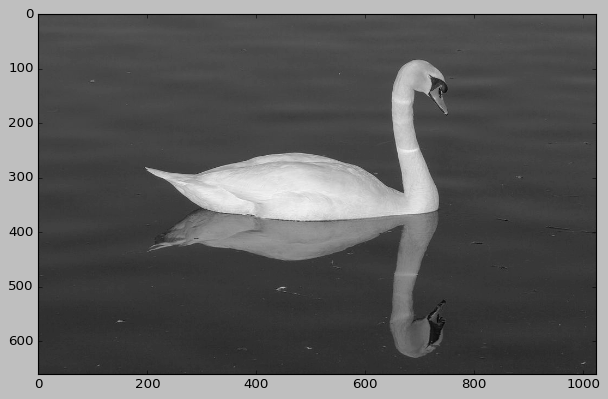

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F1A2A777790>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

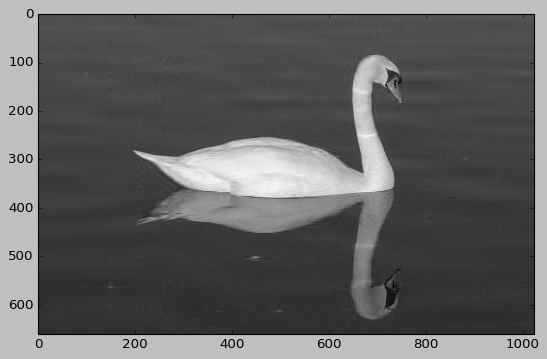

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[194. 200. 193. ... 100. 112. 115.]


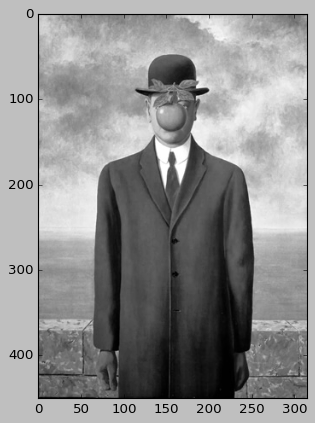

<PIL.Image.Image image mode=LA size=315x450 at 0x7F1A27B6EE10>


In [10]:
#imagen 1
img = Image.open(urllib.request.urlopen('https://www.todocuadros.es/imagenes/pintores/magritte/el-hijo-del-hombre-magritte.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [11]:
U, D, V = np.linalg.svd(imgmat)

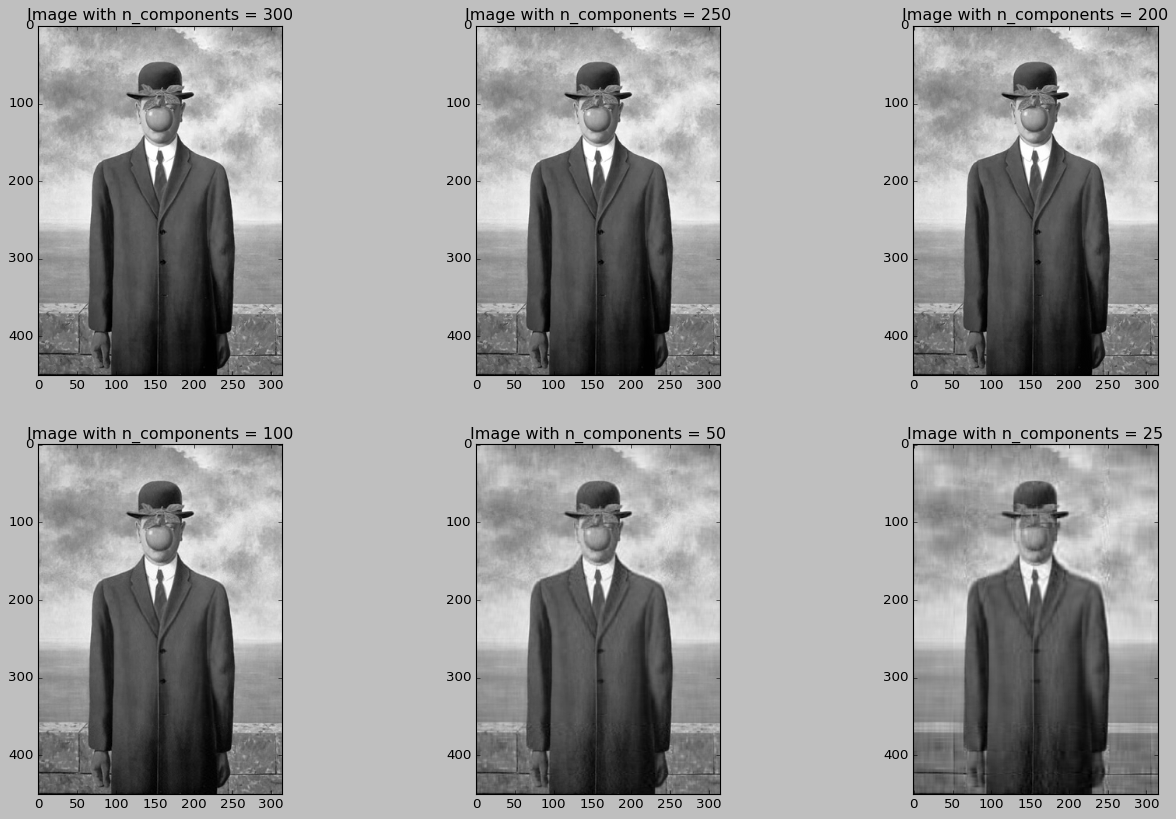

In [12]:
nvalues = [300, 250, 200, 100, 50, 25]

plt.figure(figsize = (20, 12))

for i in range(len(nvalues)):

  reconstimg = np.matrix(U[:,:nvalues[i]])*np.diag(D[:nvalues[i]])*np.matrix(V[:nvalues[i],:])

  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstimg, cmap='gray')
  plt.title(f'Image with n_components = {nvalues[i]}')

[254. 233. 232. ... 150. 161. 216.]


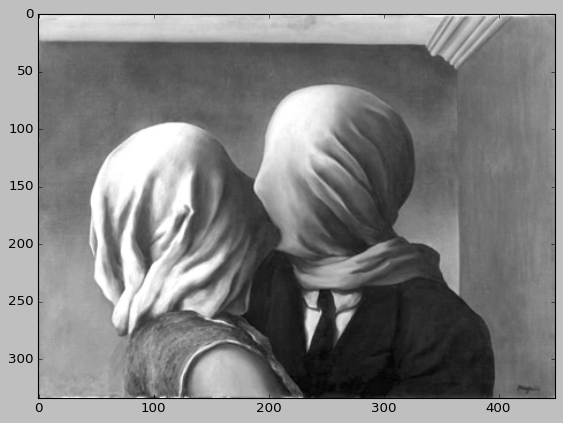

<PIL.Image.Image image mode=LA size=450x334 at 0x7F1A27282A10>


In [13]:
#imagen 2
img = Image.open(urllib.request.urlopen('https://www.todocuadros.com.mx/imagenes/pintores/magritte/los-amantes-magritte.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [14]:
U, D, V = np.linalg.svd(imgmat)

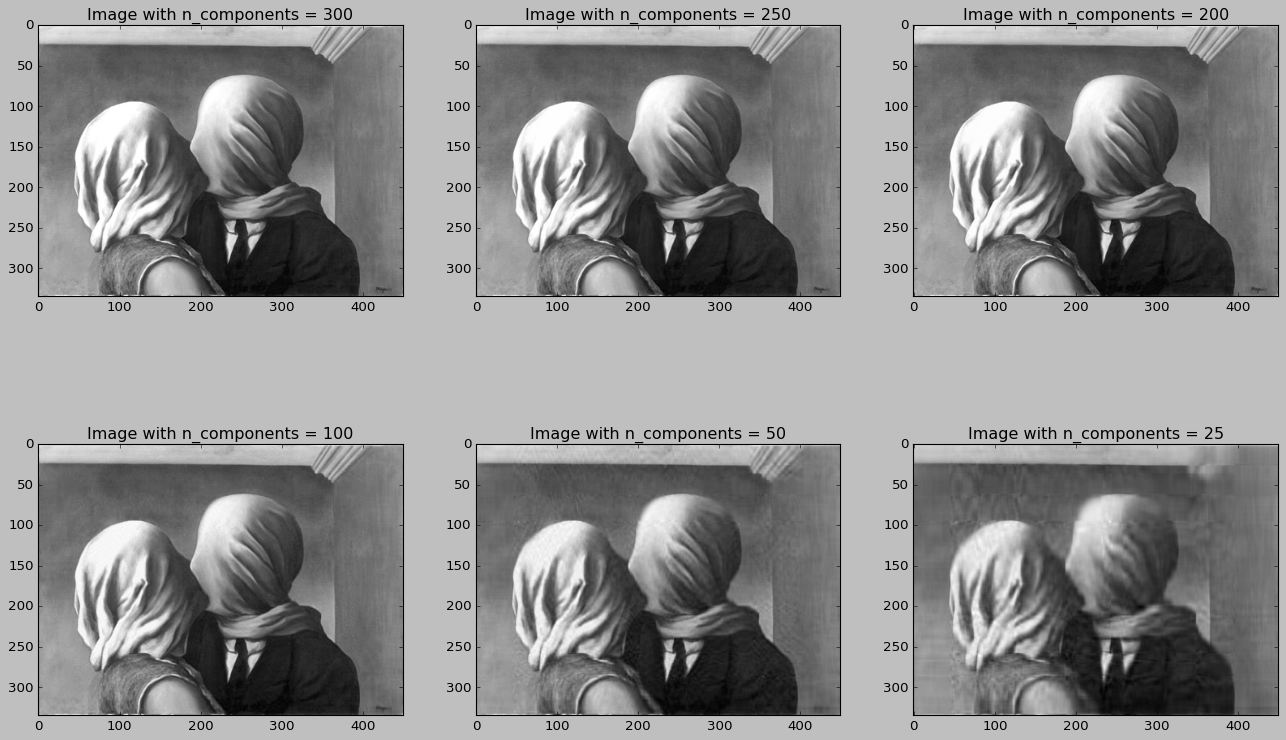

In [15]:
nvalues = [300, 250, 200, 100, 50, 25]

plt.figure(figsize = (20, 12))

for i in range(len(nvalues)):

  reconstimg = np.matrix(U[:,:nvalues[i]])*np.diag(D[:nvalues[i]])*np.matrix(V[:nvalues[i],:])

  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstimg, cmap='gray')
  plt.title(f'Image with n_components = {nvalues[i]}')

[197. 199. 203. ... 124. 148. 155.]


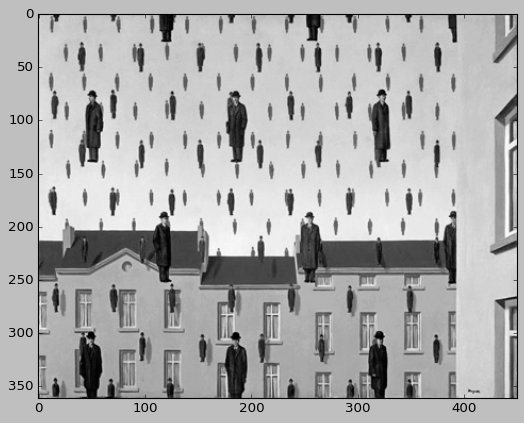

<PIL.Image.Image image mode=LA size=450x361 at 0x7F1A2731FB10>


In [16]:
#imagen 3
img = Image.open(urllib.request.urlopen('https://www.todocuadros.com.mx/imagenes/pintores/magritte/magritte-golconda.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [17]:
U, D, V = np.linalg.svd(imgmat)

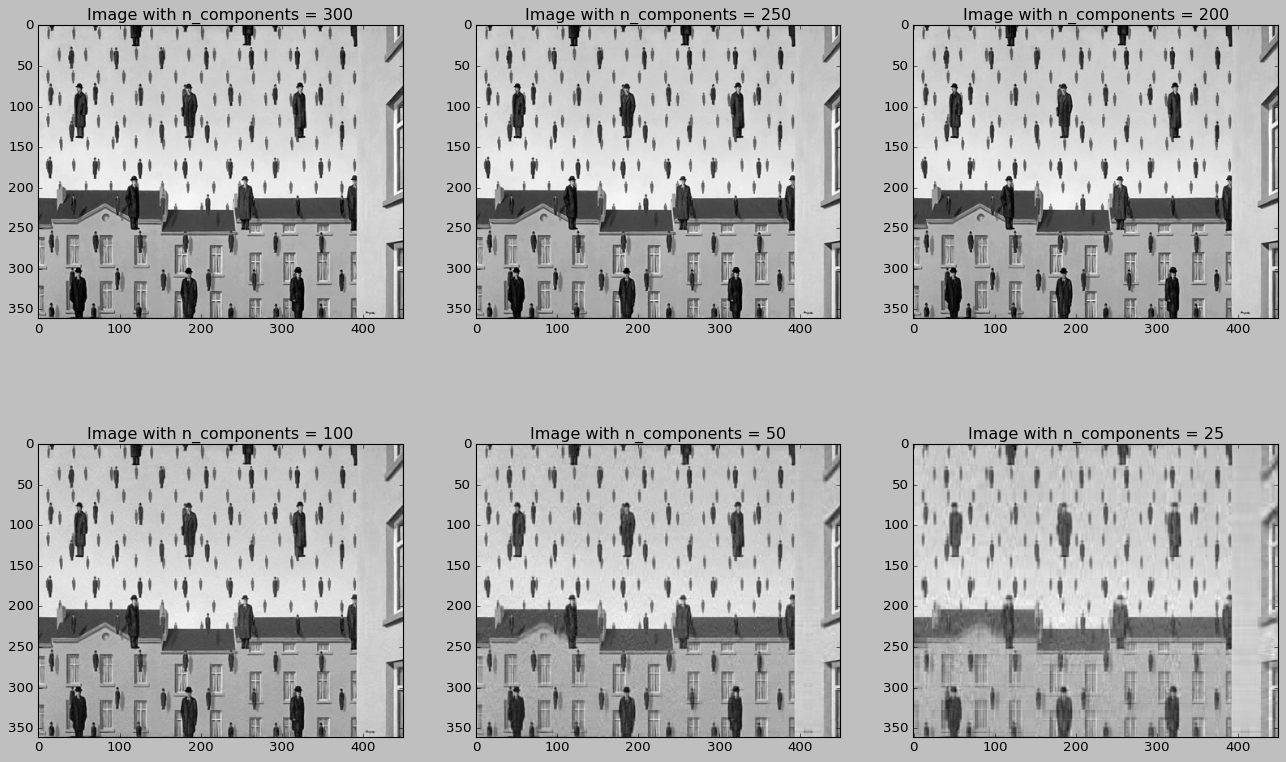

In [18]:
nvalues = [300, 250, 200, 100, 50, 25]

plt.figure(figsize = (20, 12))

for i in range(len(nvalues)):

  reconstimg = np.matrix(U[:,:nvalues[i]])*np.diag(D[:nvalues[i]])*np.matrix(V[:nvalues[i],:])

  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstimg, cmap='gray')
  plt.title(f'Image with n_components = {nvalues[i]}')

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [19]:
#importamos algunas librerias para el preprocesamiento y la reducción de dimensiones
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
#Carga de los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
#escalamos los datos
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#utilizamos PCA
pca = PCA(n_components=2) # estimamos 2 PCs
X_new = pca.fit_transform(X) 

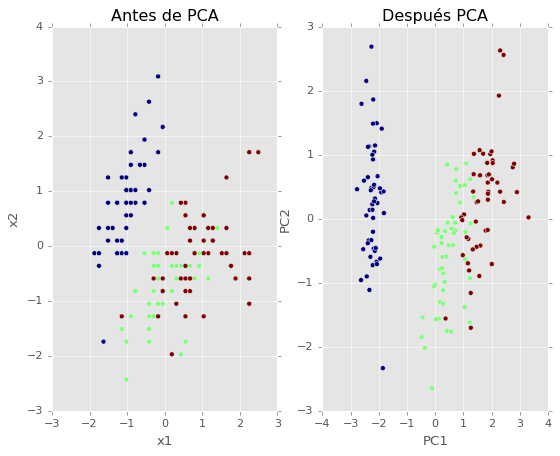

In [20]:
#graficamos los datos antes de PCA y después de PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después PCA')
plt.show()

In [21]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [22]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [23]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [24]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [25]:
def biplot(score, coeff , y):

    xs = score[:,0] # proyección en PC1
    ys = score[:,1] # proyección en PC2
    n = coeff.shape[0] # número de variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) 
    for i in range(n):
        #gráficar vectores
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

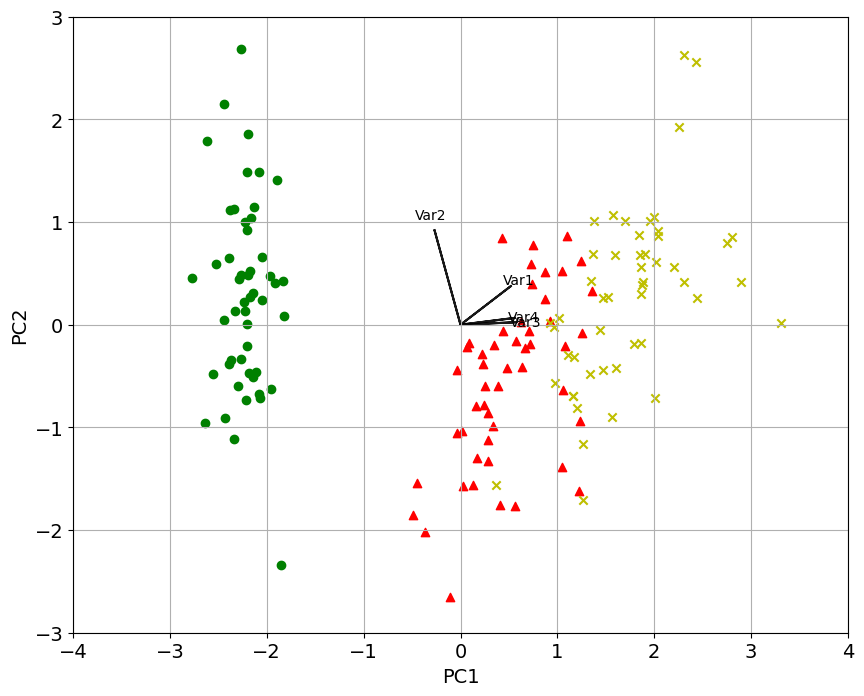

In [26]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [27]:
# Las variables 3 y 4 están correlacionadas positivamente
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [28]:
# Variables 2 y 3 están correlacionadas positivamente
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

### **Describe lo relevante del ejercicio y que descubriste de las variables análizadas.**

El ejercicio permite entender la intiución detrás de la reducción de dimensiones, en particular del PCA, el cual por medio de una combinación lineal permite representar la mayor parte de la varianza de un grupo de variables originales, y se puede describir como una transformación ortogonal.

El PCA se construye a partir de un producto de matrices, tomando como base eigenvalores y eigenvectores.

El PCA lo ocupamos principalmente cuando tenemos un gran número de variables a analizar.

### **¿Qué es feature importance y para que nos sirve?**

El PCA se basa en un producto de matrices, de eigenvalores y eigenvectores. El feature importance se puede ver como los eigenvectores con un valor más grande los cuales representan un grupo de variables.

### **¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

La reducción de dimensiones se podría ocupar al construir un modelo a partir de una base de datos con un gran número de variables. Dado que al reducir las variables simplificamos el problema. Aunque uno de los contras del PCA es que la interpretación de los componentes es más complicada que el de las variables originales.